In [54]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from streamlit import feedback

In [55]:
# Load the dataset
df=pd.read_csv(r"C:\Users\kumar\Academic_Decision_Support_System\data\synthetic\student_academic_data.csv")

In [56]:
# Display the first few rows of the dataframe
df.head()

,class,stream,previous_marks,study_hours,absences,family_support,school_support,pass_fail,physics,chemistry,biology,maths,english,computer,commerce_sub,arts_sub
0,11,Arts,50,1.358103,2,0,1,0,NaN,NaN,NaN,NaN,90,NaN,NaN,39.0
1,12,Arts,82,5.834504,11,1,0,1,NaN,NaN,NaN,NaN,51,NaN,NaN,27.0
2,9,General,89,2.514990,13,0,1,1,83.0,66.0,NaN,82.0,46,73.0,NaN,NaN
3,12,Arts,36,1.437883,6,0,1,0,NaN,NaN,NaN,NaN,80,NaN,NaN,27.0
4,10,General,73,3.223473,14,0,0,1,84.0,95.0,NaN,33.0,77,26.0,NaN,NaN


In [57]:
#define subject columns
subject_cols = [
    "maths", "english", "physics", "chemistry",
    "biology", "computer", "commerce_sub", "arts_sub"
]
df["avg_marks"] =( df[subject_cols].mean(axis=1))*2


In [58]:
# Defing weak area detection function and applying it to the dataframe
def detect_weak_subjects(row):
    weak = []
    critical = []
    
    for sub in subject_cols:
        if sub in row and not pd.isna(row[sub]):
            if row[sub] < 30:
                critical.append(sub)
            elif row[sub] < 40:
                weak.append(sub)
    
    return weak, critical

df["weak_subjects"], df["critical_subjects"] = zip(
    *df.apply(detect_weak_subjects, axis=1)
)

df[["class", "stream", "weak_subjects", "critical_subjects"]].head()





,class,stream,weak_subjects,critical_subjects
0,11,Arts,[arts_sub],[]
1,12,Arts,[],[arts_sub]
2,9,General,[],[]
3,12,Arts,[],[arts_sub]
4,10,General,[maths],[computer]


In [59]:
# Analyzing common weaknesses across all students
all_weak = Counter([w for sublist in df["weak_subjects"] for w in sublist])
all_critical = Counter([w for sublist in df["critical_subjects"] for w in sublist])

all_weak, all_critical



(Counter({'english': 721,
          'computer': 535,
          'maths': 496,
          'chemistry': 467,
          'physics': 465,
          'commerce_sub': 110,
          'arts_sub': 82,
          'biology': 77}),
 Counter({'physics': 271,
          'maths': 250,
          'chemistry': 246,
          'computer': 185,
          'english': 169,
          'arts_sub': 51,
          'commerce_sub': 39,
          'biology': 36}))

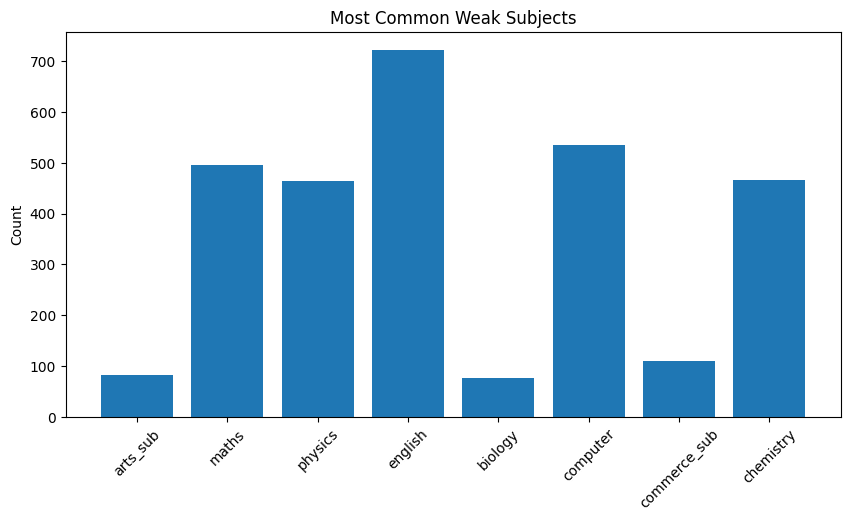

In [60]:

# Visualizing common weaknesses
plt.figure(figsize=(10,5))
plt.bar(all_weak.keys(), all_weak.values())
plt.xticks(rotation=45)
plt.title("Most Common Weak Subjects")
plt.ylabel("Count")
plt.show()


In [61]:
#creating feedback map
feedback_map = {
    "maths": "Practice algebra and daily problem solving",
    "physics": "Revise formulas and practice numericals",
    "chemistry": "Revise reactions and NCERT concepts",
    "biology": "Focus on diagrams and concept clarity",
    "english": "Improve grammar, vocabulary, and reading",
    "computer": "Practice coding and logical thinking",
    "commerce_sub": "Revise accounting and financial basics",
    "arts_sub": "Improve theory understanding and writing"
}


In [62]:
# Generating personalized feedback based on weak subjects
def weak_subject_feedback(weak_list, critical_list):
    feedback = []
    
    for sub in critical_list:
        feedback.append(f"🚨 CRITICAL in {sub.upper()}: {feedback_map[sub]}")
    
    for sub in weak_list:
        feedback.append(f"⚠️ Needs Improvement in {sub.upper()}: {feedback_map[sub]}")
    
    if not weak_list and not critical_list:
        feedback.append("✅ No major weak subjects — Keep up the good work")
    
    return feedback

df["personalized_feedback"] = df.apply(
    lambda row: weak_subject_feedback(row["weak_subjects"], row["critical_subjects"]),
    axis=1
)


In [65]:
# Assessing overall subject risk level
def subject_risk_level(row):
    score = 0
    
    score += len(row["critical_subjects"]) * 3
    score += len(row["weak_subjects"]) * 1
    
    if row["avg_marks"] < 45:
        score += 2
    
    if row["study_hours"] < 1.5:
        score += 1
    
    if score >= 6:
        return "High Risk"
    elif score >= 3:
        return "Medium Risk"
    return "Low Risk"

df["risk_level"] = df.apply(subject_risk_level, axis=1)


In [67]:
# Checking weakness feedback for a sample student


test_student = {
"class": 9,
"stream": "General",
# Subject marks
"physics": 80,
"chemistry": 65,
"maths": 2,
"english": 55,
"computer": 33,
"biology": 60,
"commerce_sub": None,
"arts_sub": None,
"avg_marks": 39,
"study_hours": 1.0
}


# Convert to DataFrame
sample = pd.DataFrame([test_student])

sample["weak_subjects"], sample["critical_subjects"] = zip(
*sample.apply(detect_weak_subjects, axis=1)
)


# Generate feedback
sample["personalized_feedback"] = sample.apply(
lambda row: weak_subject_feedback(row["weak_subjects"], row["critical_subjects"]),
axis=1
)


# Generate risk level
sample["risk_level"] = sample.apply(subject_risk_level, axis=1)

# Print result cleanly
row = sample.iloc[0]


print("Class:", row["class"])
print("Stream:", row["stream"])
print("Weak Subjects:", row["weak_subjects"])
print("Critical Subjects:", row["critical_subjects"])
print("Risk Level:", row["risk_level"])
print("\nFeedback:")
for f in row["personalized_feedback"]:
      print("-", f)

Class: 9
Stream: General
Weak Subjects: ['computer']
Critical Subjects: ['maths']
Risk Level: High Risk

Feedback:
- 🚨 CRITICAL in MATHS: Practice algebra and daily problem solving
- ⚠️ Needs Improvement in COMPUTER: Practice coding and logical thinking
